In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('D600_Task3_Dataset1_Housing_Information.csv')

# Print the first few rows of the DataFrame to verify it loaded correctly
df.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [44]:
#Task 3 - D2

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('D600_Task3_Dataset1_Housing_Information.csv')

# Define your continuous features and target
continuous_vars = [
    'SquareFootage', 'NumBathrooms', 'BackyardSpace',
    'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter',
    'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities',
    'TransportAccess', 'PreviousSalePrice'
]

# Separate input features (X) and target (y)
X = df[continuous_vars]
y = df['Price']

# Standardize the continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=continuous_vars)

# Add the target variable back in
X_scaled_df['Price'] = y.values

# Print the first few rows of the standardized DataFrame
X_scaled_df.head()

,SquareFootage,NumBathrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,PreviousSalePrice,Price
0,-1.132277,-1.187828,0.957151,-0.591776,-0.700696,-0.230889,-0.615042,0.681094,-0.037232,-0.562349,-0.733870,-0.552700,255614.8992
1,0.993926,-1.187828,0.516683,-0.865854,-0.695399,-0.197846,-0.797175,-1.104064,-0.468641,-0.140939,0.433066,-1.262469,155586.0947
2,-1.171293,-0.369602,0.868372,-1.040621,1.195478,0.049814,0.521008,0.741268,-0.377284,0.803473,1.277560,-1.271312,131050.8324
3,-0.251508,-0.100938,-0.256932,-0.499677,0.072604,1.506508,-1.019229,-0.101167,-0.280851,-0.351644,0.146450,-1.076429,151361.7125
4,-1.171293,-1.119960,-0.566178,-1.273088,-0.536502,-0.943973,2.133599,-0.482268,-0.834070,-0.178565,0.514957,-1.408430,113167.6128


In [45]:
# Export to CSV
X_scaled_df.to_csv('D600_Task3_StandardizedDataset.csv', index=False)

print("Export complete: D600_Task3_StandardizedDataset.csv")

Export complete: D600_Task3_StandardizedDataset.csv


In [46]:
# Check the mean and standard deviation of the standardized features

print(X_scaled_df[continuous_vars].mean())   # all ≈ 0
print(X_scaled_df[continuous_vars].std())    # all = 1

SquareFootage           0.000000e+00
NumBathrooms            1.299278e-16
BackyardSpace          -1.624098e-17
CrimeRate               2.030122e-16
SchoolRating           -6.171571e-16
AgeOfHome              -4.060244e-17
DistanceToCityCenter    3.248195e-16
PropertyTaxRate        -3.491810e-16
RenovationQuality      -2.273737e-16
LocalAmenities         -2.760966e-16
TransportAccess         1.624098e-17
PreviousSalePrice      -2.598556e-16
dtype: float64
SquareFootage           1.000071
NumBathrooms            1.000071
BackyardSpace           1.000071
CrimeRate               1.000071
SchoolRating            1.000071
AgeOfHome               1.000071
DistanceToCityCenter    1.000071
PropertyTaxRate         1.000071
RenovationQuality       1.000071
LocalAmenities          1.000071
TransportAccess         1.000071
PreviousSalePrice       1.000071
dtype: float64


In [47]:
#Task 3 - D3 (Descriptive Statistics)

# Select variables for descriptive stats (original values)
vars_for_stats = continuous_vars + ['Price']  # Add target

# Get summary statistics
desc_stats = df[vars_for_stats].describe().T

# Add range for clarity
desc_stats["range"] = desc_stats["max"] - desc_stats["min"]

# Display and optionally round
desc_stats = desc_stats[["count", "mean", "std", "min", "25%", "50%", "75%", "max", "range"]].round(2)

desc_stats



,count,mean,std,min,25%,50%,75%,max,range
SquareFootage,7000.0,1048.95,426.01,550.00,660.82,996.32,1342.29,2874.70,2324.70
NumBathrooms,7000.0,2.13,0.95,1.00,1.29,2.00,2.76,5.81,4.81
BackyardSpace,7000.0,511.51,279.93,0.39,301.00,495.96,704.01,1631.36,1630.97
CrimeRate,7000.0,31.23,18.03,0.03,17.39,30.38,43.67,99.73,99.70
SchoolRating,7000.0,6.94,1.89,0.22,5.65,7.01,8.36,10.00,9.78
AgeOfHome,7000.0,46.80,31.78,0.01,20.76,42.62,67.23,178.68,178.67
DistanceToCityCenter,7000.0,17.48,12.02,0.00,7.83,15.62,25.22,65.20,65.20
PropertyTaxRate,7000.0,1.50,0.50,0.01,1.16,1.49,1.84,3.36,3.35
RenovationQuality,7000.0,5.00,1.97,0.01,3.66,5.02,6.35,10.00,9.99
LocalAmenities,7000.0,5.93,2.66,0.00,4.00,6.04,8.05,10.00,10.00


In [48]:
#Task 3 - Part E1 (PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on standardized continuous variables
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [49]:
# Create a DataFrame with PCA components (version with column names)
pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.381363,-0.169676,-1.175047,-0.245787,0.847775,0.993307,-0.417569,-0.079190,0.450124,-0.165552,0.713166,0.710420
1,-0.480035,0.510639,-1.586927,0.162272,0.435137,-0.567722,-1.362718,-0.884845,-0.541466,0.432682,0.328312,-1.018762
2,-0.416599,1.914834,-0.701135,-1.413755,0.878102,0.372604,0.707210,0.197381,1.037864,0.350094,-0.740945,-0.325893
3,-0.732440,0.003061,-0.277679,-0.886833,-0.073849,-0.334759,-1.355699,1.017660,0.401512,0.356406,0.000224,-0.645253
4,-2.078943,1.176982,-1.205536,-0.845559,-0.261665,-0.868735,1.820115,-1.018581,-0.409916,0.479446,0.223094,-0.104718


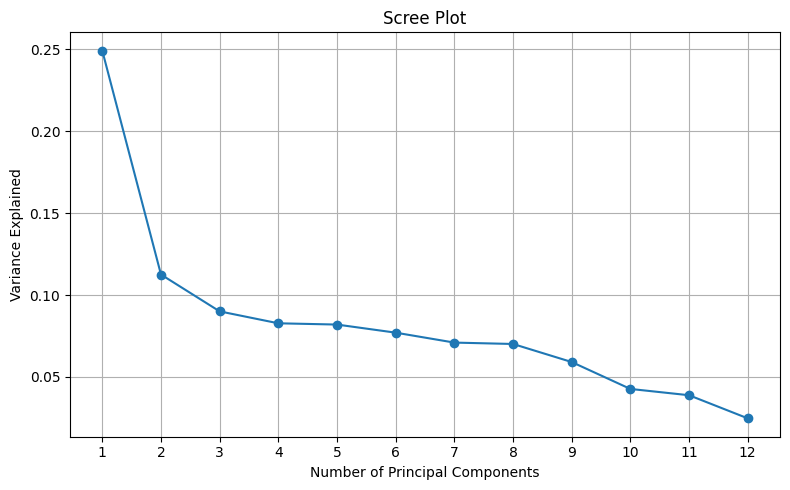

In [50]:
# Task 3 - Part E3 (PCA - Explained Variance)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
#Task 3 - Part E3 (PCA - Explained Variance)

from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})
explained_variance_df

,Principal Component,Explained Variance
0,PC1,0.249251
1,PC2,0.112543
2,PC3,0.090043
3,PC4,0.082758
4,PC5,0.081985
5,PC6,0.077038
6,PC7,0.070970
7,PC8,0.070125
8,PC9,0.059103
9,PC10,0.042659


In [52]:
# Task 3 - Part F1 (Train/Test Split)
from sklearn.model_selection import train_test_split

# Use all principal components
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
y = df['Price']  # Original target variable

# Split into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Optionally save to CSVs
X_train.to_csv("D600_Task3_TrainSet_X.csv", index=False)
X_test.to_csv("D600_Task3_TestSet_X.csv", index=False)
y_train.to_csv("D600_Task3_TrainSet_y.csv", index=False)
y_test.to_csv("D600_Task3_TestSet_y.csv", index=False)

print("Train/Test datasets created and exported.")


Train/Test datasets created and exported.


In [ ]:
# Task 3 - Part F2 (Backward Elimination Implementation)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm

# Load and prepare training data
X_train = pd.read_csv("D600_Task3_TrainSet_X.csv")
y_train = pd.read_csv("D600_Task3_TrainSet_y.csv").squeeze()

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Backward elimination function
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    while True:
        model = sm.OLS(y, X).fit()
        max_pval = model.pvalues.drop('const').max()
        if max_pval > significance_level:
            worst_feature = model.pvalues.drop('const').idxmax()
            X = X.drop(columns=worst_feature)
            print(f"Dropping {worst_feature} with p-value {max_pval:.4f}")
        else:
            break
    return X

# Run backward elimination
X_train_optimized = backward_elimination(X_train, y_train)

# Final model fit
model_optimized = sm.OLS(y_train, X_train_optimized).fit()
print("\nFinal Optimized Model Summary:\n")
print(model_optimized.summary())

# Save for documentation or plotting
X_train_optimized.to_csv("D600_Task3_Optimized_TrainSet_X.csv", index=False)
y_train.to_csv("D600_Task3_Optimized_TrainSet_y.csv", index=False)

Dropping PC7 with p-value 0.5876
Dropping PC10 with p-value 0.5237
Dropping PC6 with p-value 0.2812
Dropping PC8 with p-value 0.1164

Final Optimized Model Summary:

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:56:18   Log-Likelihood:                -71445.
No. Observations:                5600   AIC:                         1.429e+05
Df Residuals:                    5591   BIC:                         1.430e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

In [ ]:
# Display coefficients (optimized model)
model_optimized.params

const    307948.820790
PC1      110285.468895
PC2      -28342.667408
PC3       25571.845060
PC4        8525.998427
PC5       -4500.230251
PC9      -27709.536795
PC11      -6326.850624
PC12      35729.199819
dtype: float64

In [58]:
# Display p-values (optimized model)
model_optimized.pvalues

const     0.000000e+00
PC1       0.000000e+00
PC2      5.892746e-133
PC3      1.233174e-109
PC4       3.874334e-14
PC5       6.322184e-05
PC9      1.897106e-127
PC11      1.909588e-08
PC12     6.061097e-204
dtype: float64

In [56]:
# Task 3 - F3 & F4 - Mean Squared Error

from sklearn.metrics import mean_squared_error

# Load test set
X_test = pd.read_csv("D600_Task3_TestSet_X.csv")
y_test = pd.read_csv("D600_Task3_TestSet_y.csv").squeeze()

# Standardize test set using training scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Keep only columns used in the optimized training model
optimized_features = X_train_optimized.columns.drop("const")  # drop 'const' to match original columns
X_test_optimized = X_test_scaled[optimized_features]

# Add constant for statsmodels (just like in training)
X_test_optimized = sm.add_constant(X_test_optimized)



In [57]:
# Task 3 - F3 (MSE on Training Set)

y_train_pred = model_optimized.predict(X_train_optimized)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Set MSE: {mse_train:,.2f}")

# Task 3 - F4 (MSE on Test Set)

y_test_pred = model_optimized.predict(X_test_optimized)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test Set MSE: {mse_test:,.2f}")

Training Set MSE: 7,063,696,772.53
Test Set MSE: 6,797,144,306.89


In [ ]:
# Data Projects Portfolio
import projects as IndyGo
print('https://github.com/nicolegallo/IndyGo-Portfolio-Project')

import projects as planet_fitness
print('https://github.com/nicolegallo/Planet-Fitness-Portfolio-Project')





In [ ]:
passions = ["Family", 
            "Fitness and Health",
            "LGBTQ+ Organizations",
            "Innovation in Technology",
            "Public Transportation",
            "Hiking and Nature",
            "Traveling"]

print("Nicole's Favorites:")
for passion in passions:
    print("- ", passion)

Nicole's Favorites:
-  Family
-  Fitness and Health
-  Public Transportation
-  LGBTQ+ Organizations
-  Innovation in Technology
-  Traveling
